In [1]:
import cv2 
import numpy as np
import glob
import os
from itertools import combinations 
from itertools import product
import random
import matplotlib.pyplot as plt
import numpy.random as rng

In [2]:
import keras 
from keras.layers import Dense, MaxPooling2D, Convolution2D, Dropout, Input, Flatten, Subtract, merge,Conv2D,Lambda
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.models import Model,Sequential
from keras.utils import to_categorical
#from keras.initializers.h as 
from keras.models import load_model
#from tensorflow.keras.models import load_model
from keras.regularizers import l2 

Using TensorFlow backend.


## path of data folder and size of of image 

In [3]:
path_input_images =  '/tensorflow/IITD_Database/'
h = 128
w = 128

In [4]:
def unison_shuffled_copies(a,b,c):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p],c[p]

## Read the data from folder 
    

In [5]:
folder_name_list = np.sort(os.listdir(path_input_images))


out1= np.zeros((8000,h,w,3),'float')
out2= np.zeros((8000,h,w,3),'float')

pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))

count = 0
y = []
for folder_name in folder_name_list[:200]:
    
    for i in range (len(pos_comb1)):
        
        img1_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
        img1_0 = cv2.resize(img1_0,(h,w))
        
        
        img1_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')
        img1_1 = cv2.resize(img1_1,(h,w))
        out1[count]  = img1_0
        out2[count]  = img1_1
        count = count+1
        y.append(0.0)
        
        img2_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb2[i][0]).zfill(2)+'.bmp')
        img2_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb2[i][1]).zfill(2)+'.bmp')
        img2_0 = cv2.resize(img2_0,(h,w))
        img2_1 = cv2.resize(img2_1,(h,w))
        out1[count]  = img2_0
        out2[count]  = img2_1
        y.append(0.0)
        count = count+1
        
        img3_0 = cv2.imread(path_input_images + folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)+'.bmp')
        img3_1 = cv2.imread(path_input_images + folder_name + '/'+ str(neg_comb1[i][1]).zfill(2)+'.bmp') 
        
        img3_0 = cv2.resize(img3_0,(h,w))
        img3_1 = cv2.resize(img3_1,(h,w))
        out1[count]  = img3_0
        out2[count]  = img3_1
        y.append(1.0)
        count = count+1
        
        folder_name1 = str(int(folder_name) + 3).zfill(3) 
        
        img4_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
        img4_1 = cv2.imread(path_input_images + folder_name1 + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp') 
        img4_0 = cv2.resize(img4_0,(h,w))
        img4_1 = cv2.resize(img4_1,(h,w))
        out1[count]  = img4_0
        out2[count]  = img4_1
        y.append(1.0)
        count = count+1
        #print(count) 

In [6]:
out1 = out1/255.
out2 = out2/255.


## Shuffle data set 

In [7]:
out1,out2,y = unison_shuffled_copies(out1,out2,np.array(y))

In [8]:
out1_train = out1[0:7000]
out2_train = out2[0:7000]

y_train = y[0:7000]
out1_test = out1[7000:]
out2_test = out2[7000:]
y_test = y[7000:]

In [9]:
print ("X_train shape: " + str(out1.shape))

X_train shape: (8000, 128, 128, 3)


In [10]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [11]:
print ("X_train shape: " + str(out1_train.shape))
print ("X_test shape: " + str(out1_test.shape))
print ("X_train type: " + str(out1_train.dtype))
print ("X_test type: " + str(out1_test.dtype))

X_train shape: (7000, 128, 128, 3)
X_test shape: (1000, 128, 128, 3)
X_train type: float64
X_test type: float64


In [12]:
# temp_pah = path_input_images + folder_name + '/'+ str(neg_comb1[1][0]).zfill(2)+'.bmp'
# temp_img = cv2.imread(temp_path)
# temp_img = cv2.resize(temp_img,(h,w))
y_test_cat.shape

(1000, 2)

In [13]:
path_input_images + folder_name + '/'+ str(neg_comb1[1][1]).zfill(2)+'.bmp'

'/tensorflow/IITD_Database/200/09.bmp'

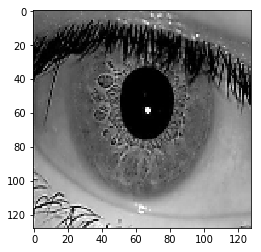

In [14]:
plt.imshow(out1_test[33])

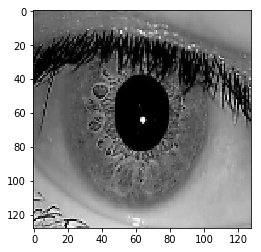

In [15]:
plt.imshow(out2_test[33])

In [16]:
y_test_cat[33]

array([1., 0.], dtype=float32)

In [17]:
W_init = 'he_normal'
b_init = 'he_normal'
# def W_init(shape,name=None):
#     """Initialize weights as in paper"""
#     values = rng.normal(loc=0,scale=1e-2,size=shape)
#     return K.variable(values,name=name)
# #//TODO: figure out how to initialize layer biases in keras.
# def b_init(shape,name=None):
#     """Initialize bias as in paper"""
#     values=rng.normal(loc=0.5,scale=1e-2,size=shape)
#     return K.variable(values,name=name)

## Network Architecture

In [18]:
def Siamese_model(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    #build convnet to use in each siamese 'leg'
    convnet = Sequential()
    convnet.add(Conv2D(64,(10,10),activation='relu',input_shape=input_shape,
                       kernel_initializer=W_init,kernel_regularizer=l2(2e-4)))
    convnet.add(MaxPooling2D())
    convnet.add(Conv2D(128,(7,7),activation='relu',
                       kernel_regularizer=l2(2e-4),kernel_initializer=W_init,bias_initializer=b_init))
    convnet.add(MaxPooling2D())
    convnet.add(Conv2D(128,(4,4),activation='relu',kernel_initializer=W_init,kernel_regularizer=l2(2e-4),bias_initializer=b_init))
    convnet.add(MaxPooling2D())
    convnet.add(Conv2D(256,(4,4),activation='relu',kernel_initializer=W_init,kernel_regularizer=l2(2e-4),bias_initializer=b_init))
    convnet.add(Flatten())
    convnet.add(Dense(4096,activation="sigmoid",kernel_regularizer=l2(1e-3),kernel_initializer=W_init,bias_initializer=b_init))
    #encode each of the two inputs into a vector with the convnet
    encoded_l = convnet(left_input)
    encoded_r = convnet(right_input)
    #merge two encoded inputs with the l1 distance between them
    L1_distance = lambda x: K.abs(x[0]-x[1])
    both = merge([encoded_l,encoded_r], mode = L1_distance, output_shape=lambda x: x[0])
    prediction = Dense(1,activation='sigmoid',bias_initializer=b_init)(both)
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction,name='Siamese_model')
    
    # return the model
    return siamese_net

In [19]:
siamese_model = Siamese_model((h,w,3))

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:27: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/usr/local/lib/python3.5/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [20]:
siamese_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         68320576    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
merge_1 (Merge)                 (None, 4096)         0           sequential_1[1][0]               
          

In [21]:
optimizer = keras.optimizers.Adam(lr = 0.0001)
siamese_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ["accuracy"])

In [27]:
history = siamese_model.fit([out1_train,out2_train],y_train,validation_data = ([out1_test,out2_test],y_test), epochs=20, batch_size = 4,shuffle=True)

Train on 7000 samples, validate on 1000 samples
Epoch 1/20
7000/7000 [==============================] - 244s 35ms/step - loss: 0.6311 - acc: 0.9050 - val_loss: 0.5040 - val_acc: 0.9380
Epoch 2/20
7000/7000 [==============================] - 240s 34ms/step - loss: 0.4687 - acc: 0.9421 - val_loss: 0.5556 - val_acc: 0.9010
Epoch 3/20
7000/7000 [==============================] - 237s 34ms/step - loss: 0.4116 - acc: 0.9543 - val_loss: 0.3653 - val_acc: 0.9630
Epoch 4/20
7000/7000 [==============================] - 237s 34ms/step - loss: 0.3583 - acc: 0.9674 - val_loss: 0.3795 - val_acc: 0.9530
Epoch 5/20
7000/7000 [==============================] - 237s 34ms/step - loss: 0.3279 - acc: 0.9713 - val_loss: 0.3073 - val_acc: 0.9740
Epoch 6/20
7000/7000 [==============================] - 237s 34ms/step - loss: 0.2859 - acc: 0.9766 - val_loss: 0.3068 - val_acc: 0.9710
Epoch 7/20
7000/7000 [==============================] - 237s 34ms/step - loss: 0.2632 - acc: 0.9786 - val_loss: 0.2886 - val_acc: 

In [28]:
pred = siamese_model.predict([out1_test,out2_test])

print('prediction =', np.round(np.transpose(pred[0:10])))
print('True_val=', y_test[0:10])

prediction = [[1. 1. 0. 0. 0. 0. 0. 1. 0. 1.]]
True_val= [1. 1. 0. 0. 0. 0. 0. 1. 0. 1.]


## uncomment to save or load model 

In [34]:
model_save_path = '/tensorflow/siamese_model_images_IITD_20EPOCH_256_UIDAI.h5'

#siamese_model.save(model_save_path)
siamese_model = load_model(model_save_path)

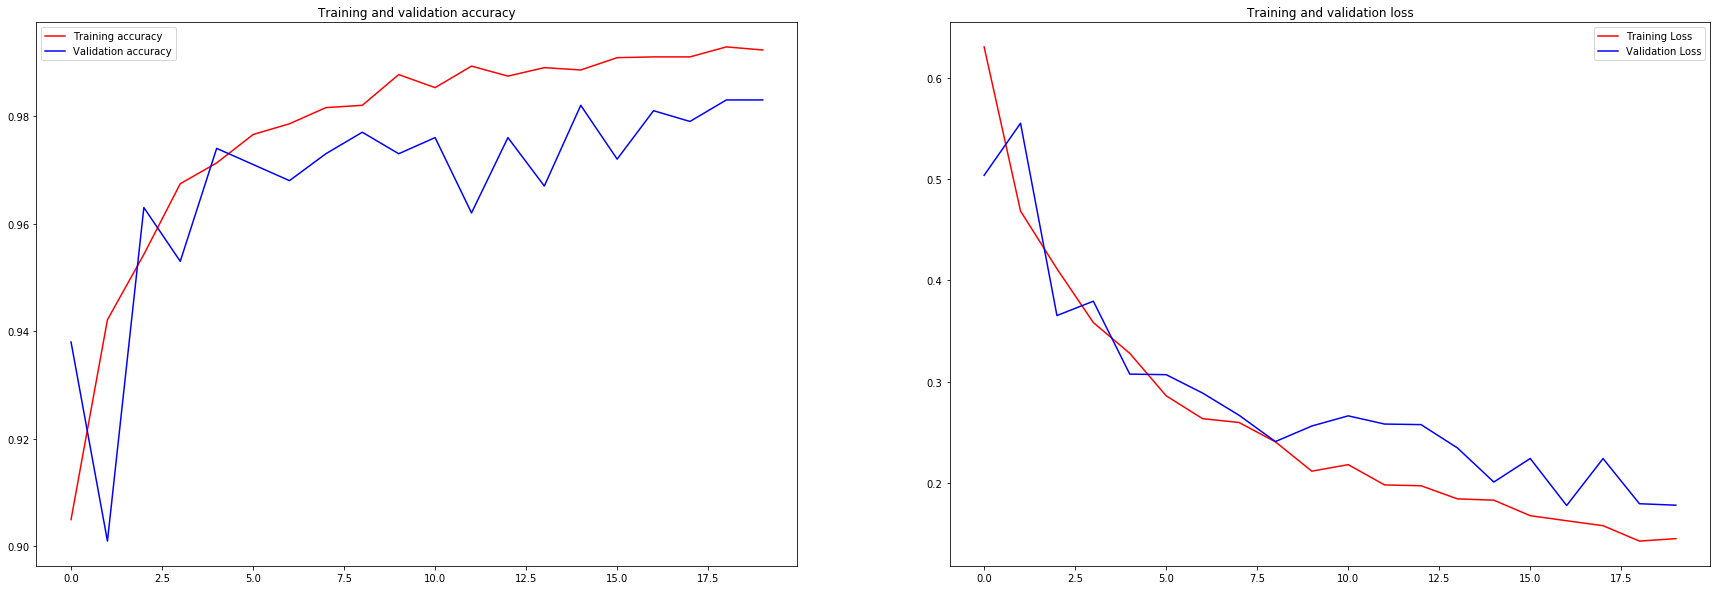

In [33]:
import matplotlib.pyplot as plt
# Let's take a look at how we did during training.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Accuracy
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# Loss
ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()

In [31]:
## generating test data 

In [35]:
print(siamese_model.metrics_names)

['loss', 'acc']


In [37]:
scores_test = siamese_model.evaluate([out1_test,out2_test],y_test, verbose=0)

In [38]:
print('test_accuracy ='  ,scores_test[1])

test_accuracy = 0.983
